## CMPINF 2100 Week 11
### Fitting Linear Models to predict NON-LINEAR output to input relationships
Remember a LINEAR MODEL is NOT just straight lines!!!

Linear Models can include non-linear FEATURES derived from the inputs!!!!
## Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import statsmodels.formula.api as smf

## Read data
But this time we will read in the NON-LINEAR relationship example.

In [4]:
df = pd.read_csv("week_11_nonlinear_data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               15 non-null     float64
 1   trend           15 non-null     float64
 2   y               15 non-null     float64
 3   true_intercept  15 non-null     float64
 4   true_slope      15 non-null     float64
 5   true_sigma      15 non-null     float64
dtypes: float64(6)
memory usage: 848.0 bytes


## Fitting
Non-linear features can be directly included within the FORMULA interface.

We can apply FUNCTIONS in the STRING FORMULA within the smf.ols function.

Instead of the formula reading as `'<OUTPUT> ~ <INPUT>'`, the formula will read as `'<OUTPUT> ~ <FEATURE DERIVED FROM INPUT>'`

Lets fit the SINE WAVE where the OUTPUT (really the MEAN OUTPUT) is a FUNCTION of the SINE FUNCTION of the INPUT.

In [8]:
lm_fit = smf.ols(formula='y ~ np.sin(x)', data=df).fit()

In [9]:
lm_fit.summary()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     407.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.36e-11
Time:                        23:39:39   Log-Likelihood:                -2.0057
No. Observations:                  15   AIC:                             8.011
Df Residuals:                      13   BIC:                             9.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0983      0.077      1.281      0.222      -0.067       0.264
np.sin(x)     -2.2167      0.110    -20.194      0.000      -2.454      -1.980
==============================================================================
Omnibus:                        1.068   Durbin-Watson:                   2.859
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.853
Skew:                           0.321   Prob(JB):                        0.653
Kurtosis:                       2.024   Cond. No.                         1.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     407.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.36e-11
Time:                        23:40:22   Log-Likelihood:                -2.0057
No. Observations:                  15   AIC:                             8.011
Df Residuals:                      13   BIC:                             9.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0983      0.077      1.281      0.2

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


This LINEAR MODEL uses a NON-LINEAR FEATURE derived from the INPUT!!!

The TREND is related to that FEATURE rather than that INPUT directly!!!

$$\mu = \beta_0 + \beta_1 \times sin(x) $$

In [11]:
lm_fit.params

Intercept    0.098301
np.sin(x)   -2.216698
dtype: float64

In [12]:
lm_fit.bse

Intercept    0.076712
np.sin(x)    0.109770
dtype: float64

In [13]:
lm_fit.pvalues

Intercept    2.224278e-01
np.sin(x)    3.362554e-11
dtype: float64

In [16]:
lm_fit.conf_int().rename(columns={0:"ci_lwr", 1:"ci_upr"})

,ci_lwr,ci_upr
Intercept,-0.067425,0.264027
np.sin(x),-2.453842,-1.979555


I prefer to visualize the COEFFICIENT SUMMARIES with a COEFFICIENT PLOT.

Lets create the plot using the approx to the 95% CI. 

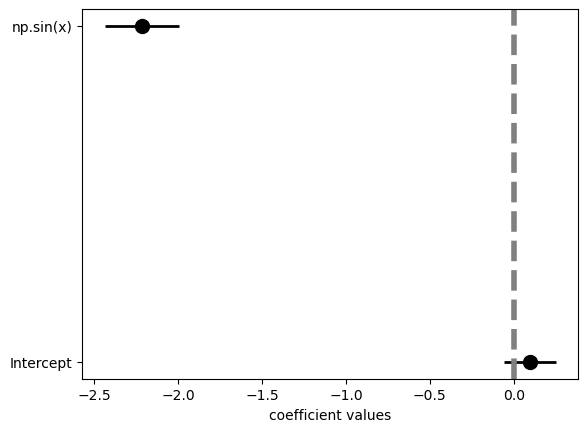

In [21]:
fig, ax = plt.subplots()

ax.errorbar(y =lm_fit.params.index,
           x = lm_fit.params,
           xerr=2*lm_fit.bse,
           fmt="o",
           color="k",
           ecolor="k",
           elinewidth=2, ms=10)

ax.axvline(x=0, linestyle="--", linewidth=4, color="grey")

ax.set_xlabel("coefficient values")

plt.show()

Because we know the real answers or the TRUE coefficients for this problem, lets compare the estimates to the TRUE values.

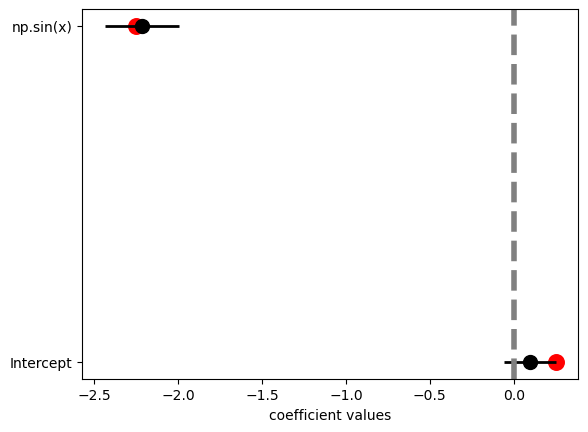

In [26]:
fig, ax = plt.subplots()

ax.errorbar(y =lm_fit.params.index,
           x = lm_fit.params,
           xerr=2*lm_fit.bse,
           fmt="o",
           color="k",
           ecolor="k",
           elinewidth=2, ms=10)

ax.axvline(x=0, linestyle="--", linewidth=4, color="grey")

ax.scatter(y=lm_fit.params.index,
           x=[np.unique(df.true_intercept), np.unique(df.true_slope)],
           color="r", s=125)

ax.set_xlabel("coefficient values")

plt.show()

In [27]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.000000,0.567520,0.905523,0.25,-2.25,0.33
1,-2.571429,1.464483,0.892371,0.25,-2.25,0.33
2,-2.142857,2.141771,2.112304,0.25,-2.25,0.33
3,-1.714286,2.476877,2.115940,0.25,-2.25,0.33
4,-1.285714,2.409187,2.515115,0.25,-2.25,0.33
5,-0.857143,1.950945,1.586887,0.25,-2.25,0.33
6,-0.428571,1.185037,0.928959,0.25,-2.25,0.33
7,0.000000,0.250000,0.141207,0.25,-2.25,0.33
8,0.428571,-0.685037,-1.163743,0.25,-2.25,0.33
9,0.857143,-1.450945,-1.098146,0.25,-2.25,0.33
